In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from psycopg2 import sql
import psycopg2
import os
import matplotlib.pyplot as plt

In [2]:
from data_utils import load_data, preprocess_data
from sqlalchemy import create_engine
import os 
import pandas as pd

sales_data, price_data, competitor_data = load_data()
df = preprocess_data(sales_data, price_data, competitor_data)

database_url = os.environ["DATABASE_URL"]
engine = create_engine(database_url)

competitor_data_query = """
    SELECT * FROM competitors
"""
competitors = pd.read_sql_query(competitor_data_query, engine)

competitor_data_query = """
    SELECT * FROM leaderboards
"""
leaderboard = pd.read_sql_query(competitor_data_query, engine)


## Sales

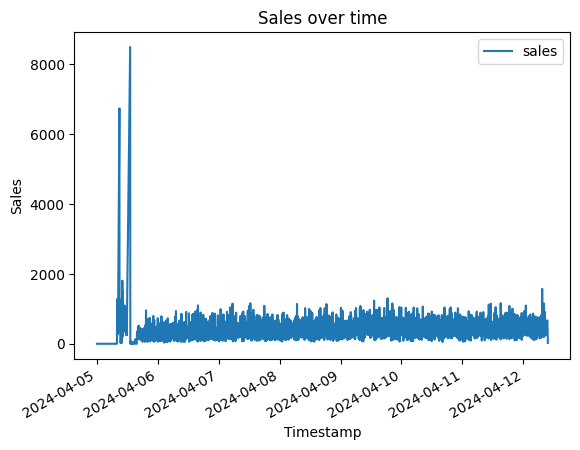

In [3]:
from figures import plot_total_sales

plot_total_sales(df.loc[lambda df: df.timestamp > "2024-04-05"])

## Competitor Prices

In [4]:
import plotly.express as px
# Group by 'competitor' and calculate average price
average_prices = competitor_data.sort_values('execution_time').groupby(['execution_time', 'competitor']).agg({'price': 'mean'}).reset_index()

# Plot using Plotly
fig = px.line(average_prices, x='execution_time', y='price', color='competitor', title='Average Price per Competitor over Time')
fig.update_xaxes(title='Competitor')
fig.update_yaxes(title='Average Price')
fig.show()

## Leaderboard

In [10]:
import plotly.express as px
# Group by 'competitor' and calculate average price
data_to_plot = leaderboard.sort_values('execution_time').melt(id_vars='execution_time', var_name='competitor', value_name='sales').reset_index(drop=True)

# Plot using Plotly
fig = px.line(data_to_plot, x='execution_time', y='sales', color='competitor', title='Average Price per Competitor over Time')
fig.update_xaxes(title='Competitor')
fig.update_yaxes(title='Average Price')
fig.show()

In [6]:


first_time = leaderboard.sort_values('execution_time').loc[lambda df: df.execution_time == df.execution_time.max()].values 
second_time = leaderboard.sort_values('execution_time').loc[lambda df: df.execution_time == "2024-04-05 18:00:02.598048"].values

first_time - second_time

array([[339000, 883000, 1018000, 1022000, 1114000,
        Timedelta('6 days 17:51:14.639224')]], dtype=object)

In [7]:
leaderboard

,gendp,dynamicdealmakers,random_competitor,redalert,thepriceisright,execution_time
0,2060000,807000,114000,23000,11000,2024-03-29 14:57:56.302736
1,2060000,808000,114000,23000,11000,2024-03-29 14:01:33.123686
2,2219000,2230000,1326000,3126000,296000,2024-04-05 08:25:54.161748
3,2219000,2238000,1333000,3126000,302000,2024-04-05 08:59:48.296429
4,2222000,2241000,1334000,3126000,306000,2024-04-05 09:16:12.813218
...,...,...,...,...,...,...
2038,2606000,3020000,2227000,4370000,1290000,2024-04-11 09:45:02.222326
2039,2606000,3021000,2228000,4370000,1290000,2024-04-11 09:50:01.569773
2040,2606000,3021000,2229000,4370000,1290000,2024-04-11 09:55:02.638331
2041,2606000,3022000,2229000,4370000,1291000,2024-04-11 10:00:02.615231


## Hours until perished


<Axes: xlabel='hours_until_perished', ylabel='sales'>

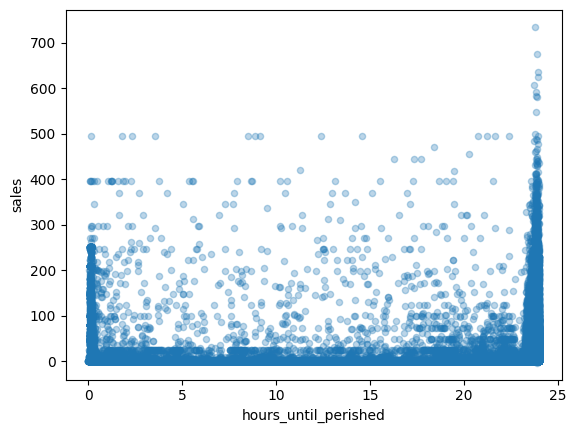

In [8]:
df.plot.scatter(x='hours_until_perished', y='sales', alpha=0.3)

In [9]:
df

,batch_id,batch_name,timestamp,product,sell_by,stock,product_name,price,start_date,execution_time,dynamicdealmakers,gendp,redalert,thepriceisright,random_competitor,stock_diff,sales,hours_until_perished
0,7572,wine_9da41229-8dca-481d-87db-442382780e08,2024-03-22 12:36:15.672533,wine,2024-03-23 03:08:00.716538,20,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.470556
1,7263,rice_b64a4264-230b-4dbb-9d26-971f89bc1601,2024-03-22 12:36:15.672533,rice,2024-03-22 20:44:00.430325,50,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.870833
2,7872,wine_7ee963f3-fd14-4360-90f0-ed9d28bdb243,2024-03-22 12:36:15.672533,wine,2024-03-23 09:28:01.039126,20,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.137222
3,7315,wine_6a4898d1-f3e1-49a1-83cc-52f4caf77d56,2024-03-22 12:36:15.672533,wine,2024-03-22 21:46:01.227348,20,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.837222
4,7382,wine_e1d0bc35-2c58-4305-967b-66d20aedb4ee,2024-03-22 12:36:15.672533,wine,2024-03-22 23:12:00.649415,20,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.404167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568075,31659,rice_3c32662f-9b96-4ecf-a0f1-866189005041,2024-04-12 09:40:31.823001,rice,2024-04-13 01:36:01.115720,0,rice,1.98,2024-04-12 09:38:44.435215,2024-04-12 09:38:41.956533,3.78,2.92,8.07,1.47,1.23,-0.0,-0.0,8.075000
1568076,32010,cheese_c34f4f8e-2d6b-4458-b91e-b9184d913586,2024-04-12 09:40:31.823001,cheese,2024-04-12 09:58:00.962294,30,cheese,0.88,2024-04-12 09:38:44.435215,2024-04-12 09:38:41.956533,1.00,3.58,4.92,NaN,4.39,-0.0,-0.0,23.708333
1568077,31206,wine_806a3084-570d-4173-8ab6-6d46a1780faf,2024-04-12 09:40:31.823001,wine,2024-04-12 16:02:01.043718,0,wine,2.84,2024-04-12 09:38:44.435215,2024-04-12 09:38:41.956533,9.53,5.08,4.72,1.48,2.80,-0.0,-0.0,17.641667
1568078,32030,cheese_7f01c227-2004-4c24-b0d3-11f5269b961f,2024-04-12 09:40:31.823001,cheese,2024-04-12 10:22:01.069191,30,cheese,0.88,2024-04-12 09:38:44.435215,2024-04-12 09:38:41.956533,1.00,4.13,NaN,NaN,2.20,-0.0,-0.0,23.308333
